In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

# Dogs and cats model detector

In [3]:
#Charge images and train the model

from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): 
    if x[0].isupper(): animal = 'Cat' 
    else: animal = 'Dog' 
    return animal

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\ipinto/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.188531,0.027136,0.010825,09:10


epoch,train_loss,valid_loss,error_rate,time
0,0.062175,0.010363,0.004060,11:59


In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Eres una gatona
Probability it's a cat: 99.9458%


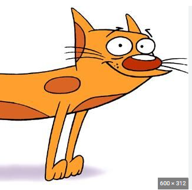

In [6]:
img = PILImage.create(uploader.data[0])
name,_,probs = learn.predict(img)

if probs[1].item() > 0.5:
    print(f"Eres una gatona")
    print(f"Probability it's a cat: {probs[1].item()*100:.4f}%")

else:
    print(f"Eres una perra")
    print(f"Probability it's a dog: {probs[0].item()*100:.4f}%")

img.to_thumb(192)

In [20]:
filepath = 'C:/Users/ipinto/OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA/PROGRAMMING/Manuales y guias/'
filename = 'model2.pkl'

learn.export(filepath + filename)

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('model.pkl'),Path('model2.pkl')]

# Reload the model

In [7]:
filepath = 'C:/Users/ipinto/OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA/PROGRAMMING/Manuales y guias/'
path = Path(filepath)

def is_cat(x): 
    if x[0].isupper(): animal = 'Cat' 
    else: animal = 'Dog' 
    return animal

learn_inf = load_learner(path/'model.pkl')
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Eres una perra
Probability it's a dog: 80.5784%


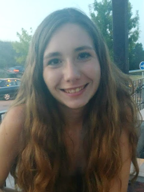

In [9]:
img = PILImage.create(uploader.data[-1])
boolean,_,probs = learn_inf.predict(img)

if probs[1].item() > 0.5:
    print(f"Eres una gatona")
    print(f"Probability it's a cat: {probs[1].item()*100:.4f}%")
else:
    print(f"Eres una perra")
    print(f"Probability it's a dog: {probs[0].item()*100:.4f}%")
img.to_thumb(192)

In [10]:
learn_inf.dls.vocab

[False, True]

In [11]:
btn_upload = widgets.FileUpload(multiple = True)
btn_upload

FileUpload(value={}, description='Upload', multiple=True)

In [12]:
try: img = PILImage.create(btn_upload.data[-1])
except: pass
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [13]:
pred,pred_idx,probs = learn_inf.predict(img)

In [14]:
lbl_pred = widgets.Label()
lbl_pred.value = f' Probability to be a dog: {probs[pred_idx]:.04f}'
lbl_pred

Label(value=' Probability to be a dog: 0.8058')

In [15]:
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    
    pred,pred_idx,probs = learn_inf.predict(img)
    if probs[1].item() > 0.5:
        lbl_pred.value = f"Eres una gatona, Probabilidad: {probs[1].item()*100:.3f}%"
    else:
        lbl_pred.value = f"Eres una perra, Probabilidad: {probs[0].item()*100:.3f}%"
        
    with out_pl: display(img.to_thumb(128,128))
        
btn_run.on_click(on_click_classify)
btn_run

Button(description='Classify', style=ButtonStyle())

In [17]:
VBox([widgets.Label('Select your dog or cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])